# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 9383 Мосин Константин, Нистратов Дмитрий и Соседков Кирилл. Вариант №6

## Цель работы
Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

#### Формула трапеций

$$ y_{n+1} = y_n + \frac {1}{2} (s_n + s_{n+1}), y_0 = 0 $$


Принимая $ s_n = e^{i\omega n}$ и $ y_n = H(\omega)e^{i\omega n}$ получим:

$$ H(\omega) = \frac {e^{i\omega} + 1}{2(e^{i\omega} - 1)} = \frac {cos(\frac {\omega}{2})}{2isin(\frac {\omega}{2})}$$

Точное значение интеграла от $e^{iwt}$  равно $\frac {e^{iwt}}{i\omega}$

Отношение значений:

$$ \gamma = cos(\frac {\omega}{2}) \frac {\frac {\omega}{2}}{sin(\frac {\omega}{2})}  $$



#### Формула прямоугольников

$$ y_{n+1} = y_n + s_{n + \frac {1}{2}}, y_0 = 0 $$

Принимая $ s_n = e^{i\omega n}$ и $ y_n = H(\omega)e^{i\omega n}$ получим:

$$ H(\omega) = \frac {e^{\frac {i\omega}{2}}} {e^{iw}-1}  = \frac {-i}{2sin(\frac{w}{2})}$$

Точное значение интеграла от $e^{iwt}$  равно $\frac {e^{iwt}}{i\omega}$

Отношение значений:

$$ \gamma = \frac {\frac {\omega}{2}}{sin(\frac {\omega}{2})}  $$



#### Формула Симпсона

$$ y_{n+1} = y_{n-1} + \frac {1}{3}(s_{n-1}+4s_n+s_{n+1}), y_0 = 0 $$

Принимая $ s_n = e^{i\omega n}$ и $ y_n = H(\omega)e^{i\omega n}$ получим:

$$ H(\omega) = \frac {(e^{i\omega(n+1)} +4e^{i\omega n} + e^{i\omega(n-1)})}{3(e^{i\omega(n+1)} - e^{i\omega(n-1)})} = \frac{cos(\omega) + 2}{3isin(\omega)}$$

Точное значение интеграла от $e^{iwt}$  равно $\frac {e^{iwt}}{i\omega}$

Отношение значений:

$$ \gamma = \frac {(2+cos(\omega))\omega}{3sin(\omega)}  $$


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$ Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Пункт 1

Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

Графики передаточных функций

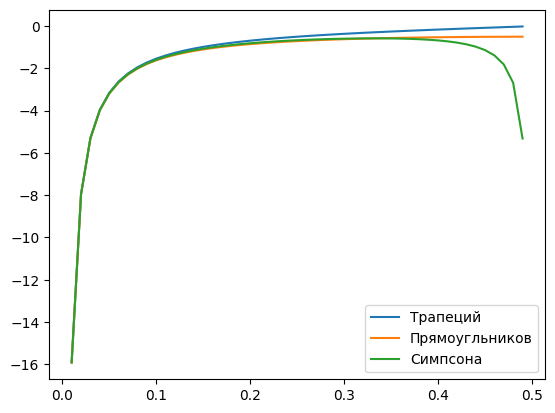

In [9]:

f1 = lambda w: (np.cos(w/2)/((2j*np.sin(w/2)))).imag
f2 = lambda w: ((-1j)/(2*np.sin(w/2))).imag
f3 = lambda w: ((2+np.cos(w))/(3*np.sin(w)*1j)).imag

x = np.arange(0.01, 0.5, 0.01)

plt.plot(x, f1(2*x*np.pi).real, label='Трапеций')
plt.plot(x, f2(2*x*np.pi), label='Прямоугльников')
plt.plot(x, f3(2*x*np.pi), label='Симпсона')
plt.legend() 
plt.show()

Графики отношения вычисляемого в результате фильтрации значения к истинному

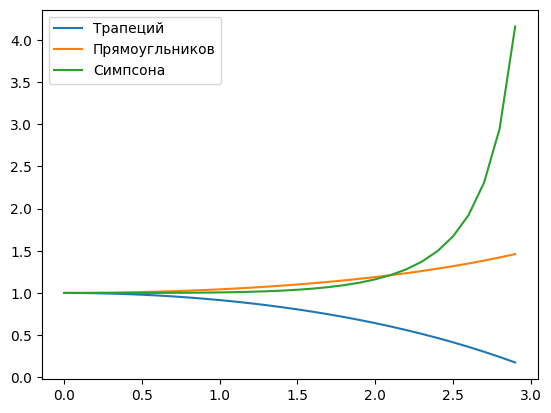

In [10]:
gamma1 = lambda w: 1 if w == 0 else np.cos(w/2)*((w/2)/(np.sin(w/2)))
gamma2 = lambda w: 1 if w == 0 else (w/2)/(np.sin(w/2))
gamma3 = lambda w: 1 if w == 0 else (2+np.cos(w))/(3*np.sin(w)/w)

x = np.arange(0, 3, 0.1)
y1 = [gamma1(i) for i in x]
y2 = [gamma2(i) for i in x]
y3 = [gamma3(i) for i in x]

plt.plot(x, y1, label='Трапеций')
plt.plot(x, y2, label='Прямоугльников')
plt.plot(x, y3, label='Симпсона')
plt.legend() 
plt.show()

#### Пункт 2

Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»: $$y_{n+2}=y_{n-1} + \frac{1}{8}(x_{n+2}+3x_{n+1}+3x_n+x_{n-1}).$$ Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

$$y_{n+2}=y_{n-1} + \frac{1}{8}(x_{n+2}+3x_{n+1}+3x_n+x_{n-1})$$
$x_n=e^{i\omega n}, y_n=H(\omega)e^{i\omega n}$
$$H(\omega)=\frac{1}{8}\frac{e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega}}{e^{2i\omega}-e^{-i\omega}}\ \ \ \ |:e^{\frac{-i\omega}{2}}$$
$$H(\omega)=\frac{cos\frac{3\omega}{2}+3cos\frac{\omega}{2}}{8isin\frac{3\omega}{2}}$$

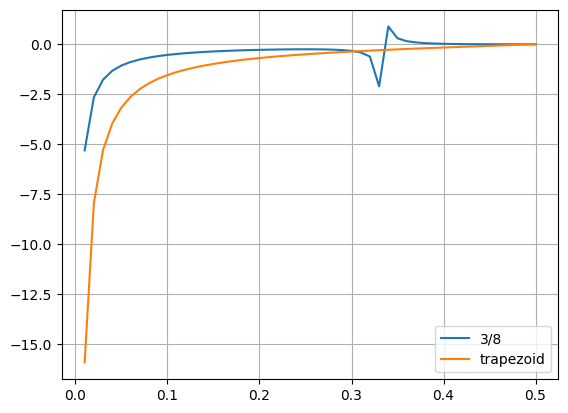

In [11]:
H_w_3_8 = lambda w: (np.cos(3 * w / 2) + 3 * np.cos(w / 2)) / (8 * 1j * np.sin(3 * w / 2))
H_w_trapezoid = lambda w: (np.cos(w / 2)) / (2 * 1j * np.sin(w / 2))
x = np.linspace(0.01, 0.5)

plt.plot(x, H_w_3_8(x * 2 * np.pi).imag, label=('3/8'))
plt.plot(x, H_w_trapezoid(x * 2 * np.pi).imag, label=('trapezoid'))
plt.grid()
plt.legend()
plt.show()

$$\gamma=\frac{Вычисленное}{Точное}=(cos\frac{3\omega}{2}+3cos\frac{\omega}{2})\frac{\frac{\omega}{8}}{sin\frac{3\omega}{2}}$$

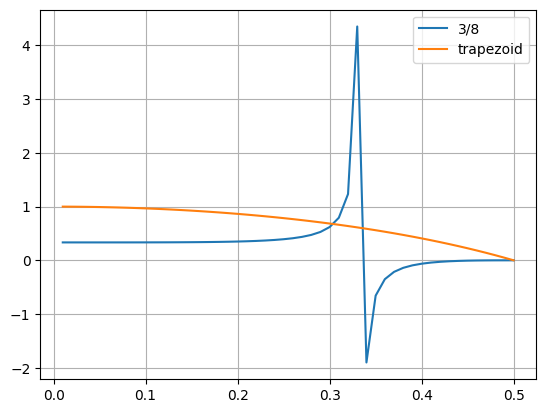

In [12]:
gamma_3_8 = lambda w: (np.cos(3 * w / 2) + 3 * np.cos(w / 2)) * ((w / 8) / np.sin(3 * w / 2))
gamma_trapezoid = lambda w: np.cos(w / 2) * ((w / 2) / np.sin(w / 2))

plt.plot(x, gamma_3_8(x * 2 * np.pi), label=('3/8'))
plt.plot(x, gamma_trapezoid(x * 2 * np.pi), label=('trapezoid'))
plt.grid()
plt.legend()
plt.show()

#### Пункт 3

Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении пп. 1 и 2.

Имея графики квадратурных формул прямоугольника, трапеции, Симпсона и Симпсона 3/8, можно сказать:

1. Формула трапеций прямо пропорционально подавляет частоту f, в отличие от других формул;

2. Формула Симпсона усиливает верхнюю часть интервала Найквиста. На частоте Найквиста интегрируемая функция может иметь значения +1, -1, +1, -1, +1, ..., и в формуле Симпсона эти значения умножаются на коэффициенты 1, 4, 2, 4, 2, 4, ... и, конечно, все делятся на 3. Рассмотрев произведения, мы увидим, что каждая пара значений комбинируется так, чтобы дать отрицательное значение;

#### Вывод

В ходе выполнения лабораторной работы были выведены формулы передаточных функций прямоугольника, трапеций, Симпсона и Симпсона 3/8, а также задействованы графические библиотеки для отображения графиков отображения вычисленного значения к истинному. По данным графикам были проинтерпретированы частотные свойства передаточных функций. Так, например, формула трапеций подавляет частоту f, в то время как формула Симпсона усиливает ее.